## 확률적 경사하강법 (Stochastic Gradient Descent , SGD)

## 손실함수

## 로지스틱 손실함수  =  이진 크로스 엔트로피 손실함수

타깃 = 1일때
-> - log(예측확률)

타깃 = 0 일때
-> -log(1-예측확률)

## 데이터 전처리


In [9]:
import pandas as pd
import numpy as np
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [10]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## SGDClassifier(확률적 경사하강법의 분류알고리즘)  
## <-> SGDRegressor (확률적 경사하강법의 회귀알고리즘)


In [12]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) ## SGDClassifier 는 모델이나 알고리즘이 아닌, 특정한 모델을 추적하는 알고리즘이다. 파라미터 중 loss 는 손실함수를 지정해주는 역할울 한다. 여기서는 log 손실함수를 지정하였다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


  - 위의 모델에서는 훈련데이터셋의 정확도가 테스트데이터셋의 정확도 보다 낮은 것을 볼수 있다. 따라서 과소적합된것을 알수 있으며, 이를 해결하기 위해서는 max_iter 즉 에포크(epoch)의 크기를 늘려 주어야 한다.
  - 이전의 LinearRegression 모델에서 변량의 수를 늘린 다중회귀모델(Multiple Regression)에서 비선형 관계를 파악하기 위해 다항모델(Polynomial Regression)으로 변환 시켰을때 과대적합, 혹은 과소적합 등의 문제를 해결하기 위하여 릿지회귀 혹은 라쏘회귀 등의 모델을 사용하였을 때 규제의 정도를 조절하는 하이퍼 파라미터인 alpha 값과 비슷하게 작동한다고 볼 수 있다.

  - 또한 Logistic Regression 에서 다중 로지스틱 회귀 모델에서의 C값(규제의 강도를 의미하는 λ(람다)의 역수) 값과 비슷하게 작동한다고 볼수 있다.(모두 하이퍼 파라미터 값이다)

  - SGDClassifier 는 모델이나 알고리즘이 아닌, 특정한 모델을 추적하는 알고리즘이다. 파라미터 중 loss 는 손실함수를 지정해주는 역할울 한다. 여기서는 log 손실함수를 지정하였다.

  - SGDClassfier 는 배치 혹은 미니 배치 등을 지원하지 않는다.(즉 전체 데이터를 입력한다고 하더라도 전체 데이터를 한번에 다 쓰는 것이아니라 데이터를 한개씩 꺼내서 적용한다.)

In [13]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


  - partial_fit 메소드와 이전의 fit 메소드와 다른 것은 fit은 이전의 W,b( 가중치 와 편차 등)을 모두 버리고 다시 학습을 하는 반면, partial_fit 은 기존의 학습했었던 W,b를 그대로 유지하면서 한번 다시 훈련을 한다. 따라서 정확도의 개선이 발생한다.

## 조기종료 (early stopping)

  - 일단 epoch 를 크게 늘려서 실행하고 훈련세트와 데스트 세트가 서로 가까운 지점, 즉 데스트 세트의 정확도가 낮아지기 전의 에포크를 찾는 방법을 의미한다.

In [15]:
sc = SGDClassifier(loss='log', random_state=42) ## log 손실함수 외의 SVM(support verctor machine)손실함수를 지정하고 싶으면 'hinge' 파라미터 값을 입력한다.
train_score = []
test_score = []

classes = np.unique(train_target)  ## classes 변수에 독자적인 변수들의 값을 unique 함수로 저장한다.
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes) ## partial_fit 메소드에서는 classes 파라미터를 직접 지정을 해주어야 한다. 왜냐면 훈련세트의 일부분만 주어진다고 가정하기 때문에 fit 함수(classes 파라미터를 지정하지 않아도 직접 target 데이터에서 classes를 추출) 없이 단독으로 partial_fit 메소드를 사용할때는 반드시 지정을 해주어야한다.
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))   ### 리스트에 train_score 와 test_score 를 추가하여 만든 것은 시각화를 하기 위함이다

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


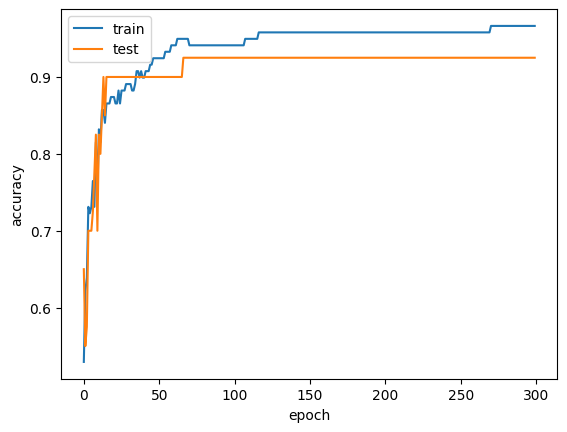

In [17]:
# 위의 조기종료를 시각화
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.legend(['train', 'test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()